In [1]:
!pip install seaborn

In [3]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 15.7 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/30.2 MB 17.3 MB/s eta 0:00:00a 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
with open("breastcancer_traintest.csv", mode="r") as infile, open("reformatted.csv", mode="w", newline="") as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    header = next(reader)

    # Remove 'id' column if it's the first column
    if header[0].lower() == "id":
        header = header[1:]

    # Convert 'diagnosis' to numeric (M → 1, B → 0)
    header[0] = "diagnosis_numeric"

    # Write the modified header to the new file
    writer.writerow(header)

    for row in reader:
        # Remove the ID column
        row = row[1:]

        # Convert 'diagnosis' (M/B) to numeric
        row[0] = 1 if row[0] == "M" else 0

        # Write the reformatted row
        writer.writerow(row)



In [18]:
df = pd.read_csv("reformatted.csv")
print(df.head())

   diagnosis_numeric  radius_mean  texture_mean  perimeter_mean  area_mean  \
0                  1        16.02         23.24          102.70      797.8   
1                  0        12.32         12.39           78.85      464.1   
2                  0        12.85         21.37           82.63      514.5   
3                  1        14.90         22.53          102.10      685.0   
4                  1        18.61         20.25          122.10     1094.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08206           0.06669         0.03299              0.03323   
1          0.10280           0.06981         0.03987              0.03700   
2          0.07551           0.08316         0.06126              0.01867   
3          0.09947           0.22250         0.27330              0.09711   
4          0.09440           0.10660         0.14900              0.07731   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [20]:
X = df.drop(columns=['diagnosis_numeric'])  # Features
y = df['diagnosis_numeric']  # Target variable

In [21]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [23]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        59
           1       0.91      0.91      0.91        32

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



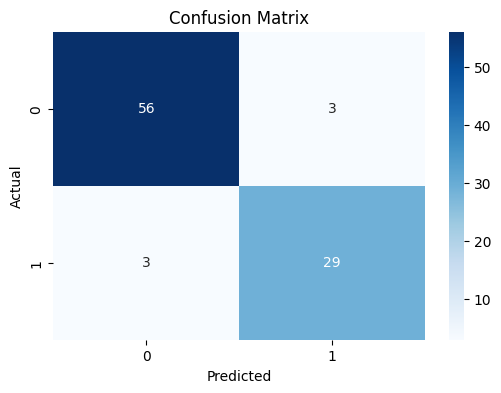

In [26]:


# Make predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
